In [3]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model

Lets Load our Data To a Dataframes, making exploratory analysis easier.

In [4]:
df = pd.read_csv("train.csv")

If we look at the "count" in describe, we see that for some its not 1460, this means that we have missing values and need to find a way to do some preprocessing on such columns

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(df.columns)

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [7]:
df[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Seems like majority of our houses were built around 1980's to 2015 and as early as 1865!

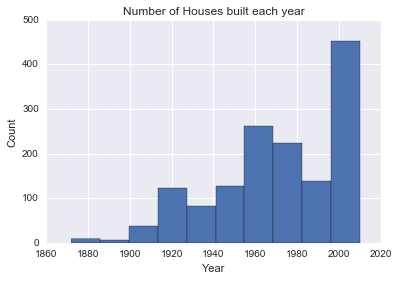

In [8]:
plt.title("Number of Houses built each year")
plt.xlabel("Year")
plt.ylabel("Count")
df["YearBuilt"].hist()

Majority of the House prices seems to fall between 1,500,000 to 2,000,000

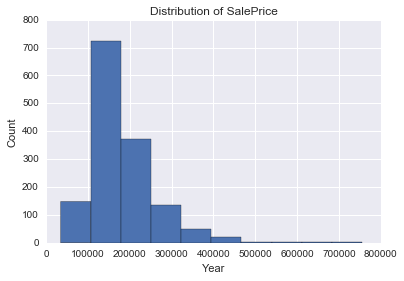

In [10]:
plt.title("Distribution of SalePrice")
plt.xlabel("Year")
plt.ylabel("Count")
df["SalePrice"].hist()

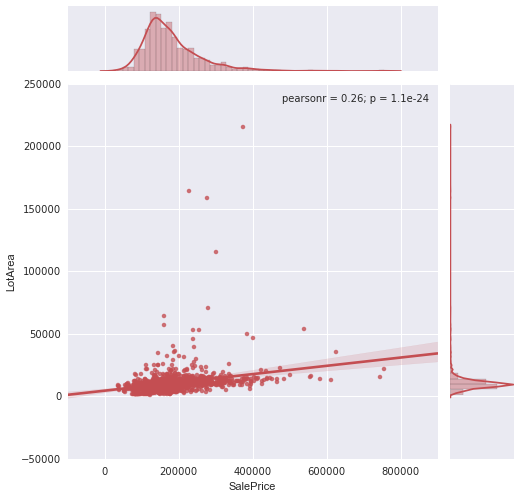

In [231]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("SalePrice","LotArea",data=df, kind="reg", color="r", size=7)

In [234]:
df[['LotArea']].sort('LotArea',ascending=False)

,LotArea
313,215245
335,164660
249,159000
706,115149
451,70761
1298,63887
1396,57200
769,53504
457,53227
384,53107


In [123]:
sub_df = df[['LotFrontage','LotArea','YearBuilt',
             'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', u'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 
              'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt','GarageCars', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']]
sub_df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000


(70.049958368026651, 24.284751774483201)
(70.049958368026637, 22.024022688706964)


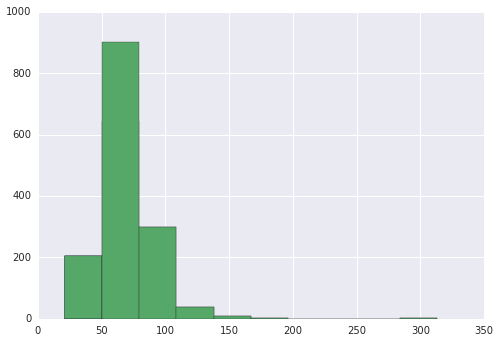

In [119]:
sub_df.LotFrontage[sub_df.LotFrontage.notnull()].hist()
print(sub_df.LotFrontage.mean(),sub_df.LotFrontage.std())
sub_lotArea = sub_df.LotFrontage.fillna(sub_df.LotFrontage.mean())
sub_lotArea.hist()
print(sub_lotArea.mean(),sub_lotArea.std())

(103.68526170798899, 181.06620658721661)
(103.68526170798899, 180.56911242597204)


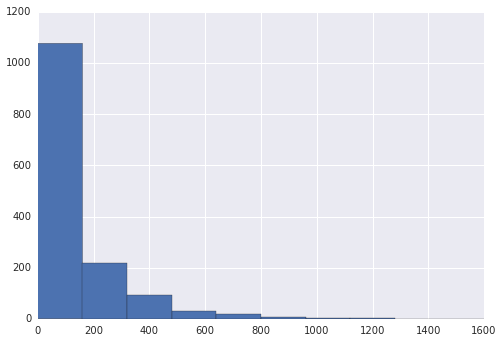

In [144]:
sub_df.MasVnrArea[sub_df.MasVnrArea.isnull()]
#sub_df.MasVnrArea[sub_df.MasVnrArea.notnull()].hist()
print(sub_df.MasVnrArea.mean(),sub_df.MasVnrArea.std())
sub_df.MasVnrArea[sub_df.MasVnrArea.notnull()].mean()
sub_MasVnrArea = sub_df.MasVnrArea.fillna(sub_df.MasVnrArea.mean())
#sub_MasVnrArea.hist()
print(sub_MasVnrArea.mean(),sub_MasVnrArea.std())

In [160]:
sub_df[['2ndFlrSF','LowQualFinSF','GrLivArea', u'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 
              'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt']].describe()

sub_df.GarageYrBlt[sub_df.GarageYrBlt.isnull()]
print(sub_df.GarageYrBlt.value_counts().to_dict())

{1900.0: 1, 1906.0: 1, 1908.0: 1, 1910.0: 3, 1914.0: 2, 1915.0: 2, 1916.0: 5, 1918.0: 2, 1920.0: 14, 1921.0: 3, 1922.0: 5, 1923.0: 3, 1924.0: 3, 1925.0: 10, 1926.0: 6, 1927.0: 1, 1928.0: 4, 1929.0: 2, 1930.0: 8, 1931.0: 4, 1932.0: 3, 1933.0: 1, 1934.0: 2, 1935.0: 4, 1936.0: 5, 1937.0: 2, 1938.0: 3, 1939.0: 9, 1940.0: 14, 1941.0: 10, 1942.0: 2, 1945.0: 4, 1946.0: 4, 1947.0: 2, 1948.0: 11, 1949.0: 8, 1950.0: 24, 1951.0: 6, 1952.0: 3, 1953.0: 12, 1954.0: 19, 1955.0: 13, 1956.0: 16, 1957.0: 20, 1958.0: 21, 1959.0: 17, 1960.0: 19, 1961.0: 13, 1962.0: 21, 1963.0: 16, 1964.0: 18, 1965.0: 21, 1966.0: 21, 1967.0: 15, 1968.0: 26, 1969.0: 15, 1970.0: 20, 1971.0: 13, 1972.0: 14, 1973.0: 14, 1974.0: 18, 1975.0: 9, 1976.0: 29, 1977.0: 35, 1978.0: 19, 1979.0: 15, 1980.0: 15, 1981.0: 10, 1982.0: 4, 1983.0: 7, 1984.0: 8, 1985.0: 10, 1986.0: 6, 1987.0: 11, 1988.0: 14, 1989.0: 10, 1990.0: 16, 1991.0: 9, 1992.0: 13, 1993.0: 22, 1994.0: 18, 1995.0: 18, 1996.0: 20, 1997.0: 19, 1998.0: 31, 1999.0: 30, 2000.0

In [162]:
X_df = df[['LotFrontage','LotArea','YearBuilt',
             'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', u'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 
    'TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MoSold', 'YrSold','SalePrice']]
X_df.LotFrontage = sub_lotArea
X_df.MasVnrArea = sub_MasVnrArea
X_df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,22.024023,9981.264932,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


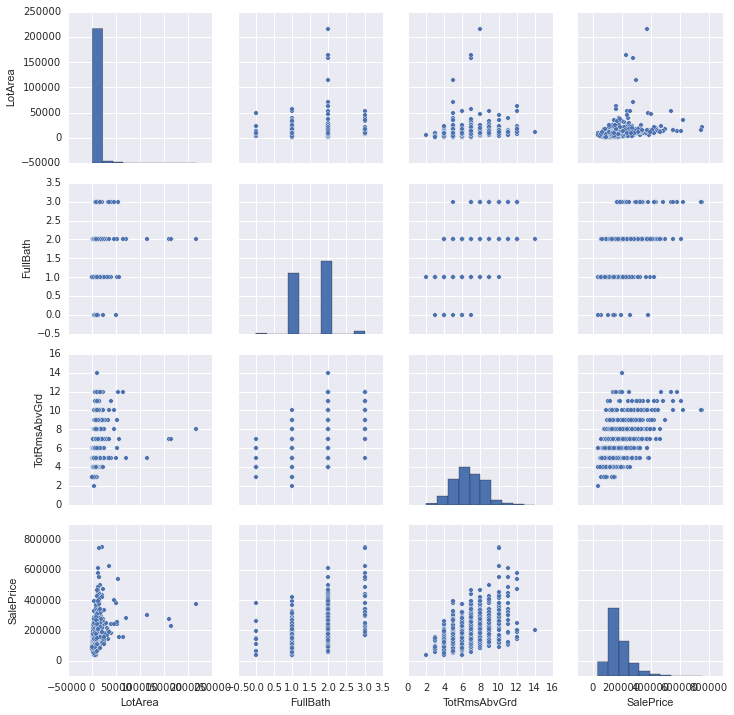

In [165]:
four_df = X_df[['LotArea','FullBath','TotRmsAbvGrd','SalePrice']]
sns.pairplot(four_df)

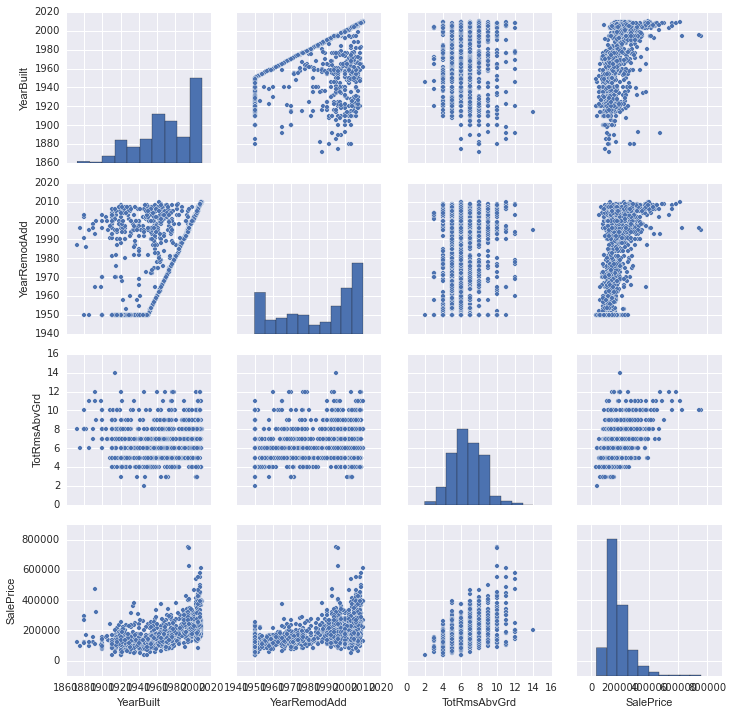

In [166]:
four_df = X_df[['YearBuilt','YearRemodAdd','TotRmsAbvGrd','SalePrice']]
sns.pairplot(four_df)

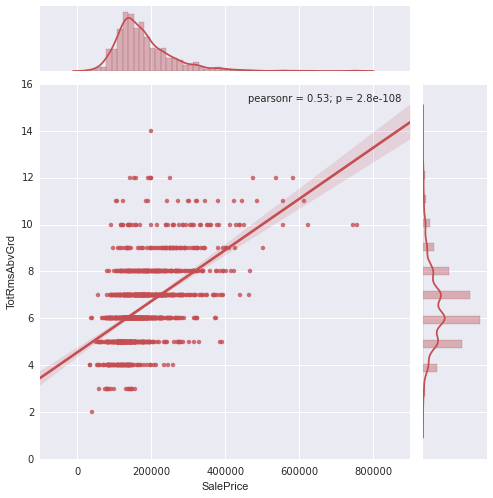

In [181]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("SalePrice","TotRmsAbvGrd",data=df, kind="reg", color="r", size=7)

In [219]:
X_df[['TotRmsAbvGrd','SalePrice']].sort('SalePrice',ascending=False)

,TotRmsAbvGrd,SalePrice
691,10,755000
1182,10,745000
1169,10,625000
898,11,611657
803,12,582933
1046,11,556581
440,10,555000
769,12,538000
178,9,501837
798,11,485000


In [220]:
X_df['SalePrice'].nlargest(3)

691     755000
1182    745000
1169    625000
Name: SalePrice, dtype: int64

In [222]:
X_df['SalePrice'].nsmallest(3)

495    34900
916    35311
968    37900
Name: SalePrice, dtype: int64

In [223]:
X_df.iloc[691]

LotFrontage         104
LotArea           21535
YearBuilt          1994
YearRemodAdd       1995
MasVnrArea         1170
BsmtFinSF1         1455
BsmtFinSF2            0
BsmtUnfSF           989
TotalBsmtSF        2444
1stFlrSF           2444
2ndFlrSF           1872
LowQualFinSF          0
GrLivArea          4316
BsmtFullBath          0
BsmtHalfBath          1
FullBath              3
HalfBath              1
BedroomAbvGr          4
KitchenAbvGr          1
TotRmsAbvGrd         10
Fireplaces            2
GarageCars            3
GarageArea          832
WoodDeckSF          382
OpenPorchSF          50
EnclosedPorch         0
3SsnPorch             0
ScreenPorch           0
PoolArea              0
MoSold                1
YrSold             2007
SalePrice        755000
Name: 691, dtype: float64

In [214]:
X_df.iloc[495]

LotFrontage         60
LotArea           7879
YearBuilt         1920
YearRemodAdd      1950
MasVnrArea           0
BsmtFinSF1         495
BsmtFinSF2           0
BsmtUnfSF          225
TotalBsmtSF        720
1stFlrSF           720
2ndFlrSF             0
LowQualFinSF         0
GrLivArea          720
BsmtFullBath         0
BsmtHalfBath         0
FullBath             1
HalfBath             0
BedroomAbvGr         2
KitchenAbvGr         1
TotRmsAbvGrd         4
Fireplaces           0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF        523
EnclosedPorch      115
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MoSold              11
YrSold            2009
SalePrice        34900
Name: 495, dtype: float64

In [229]:
X_df[['YearBuilt','YearRemodAdd','YrSold','TotRmsAbvGrd','LotArea','LotFrontage','SalePrice']].sort('SalePrice'
                            ,ascending=False)

,YearBuilt,YearRemodAdd,YrSold,TotRmsAbvGrd,LotArea,LotFrontage,SalePrice
691,1994,1995,2007,10,21535,104.000000,755000
1182,1996,1996,2007,10,15623,160.000000,745000
1169,1995,1996,2006,10,35760,118.000000,625000
898,2009,2010,2010,11,12919,100.000000,611657
803,2008,2009,2009,12,13891,107.000000,582933
1046,2005,2006,2006,11,16056,85.000000,556581
440,2008,2008,2009,10,15431,105.000000,555000
769,2003,2003,2010,12,53504,47.000000,538000
178,2008,2009,2009,9,17423,63.000000,501837
798,2008,2009,2009,11,13518,104.000000,485000


In [230]:
sub_data  = X_df[['YearBuilt','YearRemodAdd','YrSold','TotRmsAbvGrd','LotArea','LotFrontage',"SalePrice"]]
x = sub_data[['YearBuilt','YearRemodAdd','YrSold','TotRmsAbvGrd','LotArea','LotFrontage']]
X_train = x[:-20]
X_test = x[-20:]

# Split the targets into training/testing sets
y_train = sub_data.SalePrice[:-20]
y_test = sub_data.SalePrice[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


('Coefficients: \n', array([  9.01604055e+02,   8.47905494e+02,  -1.24429180e+03,
         1.94426365e+04,   1.18471939e+00,   3.75314676e+02]))
Mean squared error: 2354486772.79
Variance score: 0.37
